# Unsupervised Learning: Types of Unsupervised Learning

Unsupervised learning is all about discovering hidden structure in unlabeled data. In this notebook, we'll explore several different clustering approaches and see how each one handles different shapes and patterns in data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, BisectingKMeans
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import silhouette_score, rand_score
from scipy.cluster.hierarchy import dendrogram

## What is Unsupervised Learning?

Unsupervised learning deals with data that has **no labels**, meaning the algorithm must discover structure on its own. Instead of learning by example (like supervised learning), unsupervised methods identify patterns, groupings, or relationships based only on the data itself.

### Supervised vs Unsupervised: A Quick Recap
- **Supervised Learning:** You have inputs *and* outputs — like a study guide with an answer key. The model learns to map features to known labels.
- **Unsupervised Learning:** You only have inputs — like taking notes without knowing what the exam questions will be. The model looks for structure or grouping on its own.

### Why "Unsupervised"?
There’s no teacher, no correct answers provided ahead of time. The algorithm must uncover meaningful clusters or patterns entirely from the data structure.

### Common Real-World Uses
- Spotify: Groups similar songs into playlists
- Retail: Identifying customer segments for marketing
- Biology: Grouping gene expression profiles
- News: Clustering articles by topics
- Gaming: Detecting different play styles

### Intuition Example
Imagine sorting students into teams for an event without any categories given. You might group by behavior, interests, or who hangs out together — that's clustering!

----

## Centroid-Based Clustering

Centroid-based clustering groups data points according to their similarity to a central representative called a **centroid**. This centroid acts as the "center of mass" for the cluster.

### The Big Idea
Suppose you're organizing a pizza party. You want to place pizza stations (centroids) in a way that minimizes how far students must walk. Students naturally go to the station closest to them. Over time, stations would shift until each one is in the ideal location.

Clustering works similarly:
- Pick the number of clusters (number of pizza stations)
- Assign each data point to its nearest centroid
- Adjust centroids based on cluster members
- Repeat until stable

### Key Goals
- **Minimize distances within clusters** (points in the same cluster should be close)
- **Maximize distances between clusters** (clusters should be well-separated)

This makes centroid-based clustering intuitive and computationally efficient.

----

## K-Means Clustering

K-Means is the most widely used clustering algorithm because it's fast, intuitive, and works well when clusters are roughly spherical.

### What Makes K-Means Unique?
K-Means uses the **mean** (average position) of points in a cluster as the centroid.

### The K-Means Algorithm
1. Pick k
2. Randomly place centroids
3. Assign points
4. Update centroids
5. Repeat until stable

### Visualization of the Clustering Process

To get an intuition for how centroid-based methods work, let's walk through the process visually using K-Means as an example.

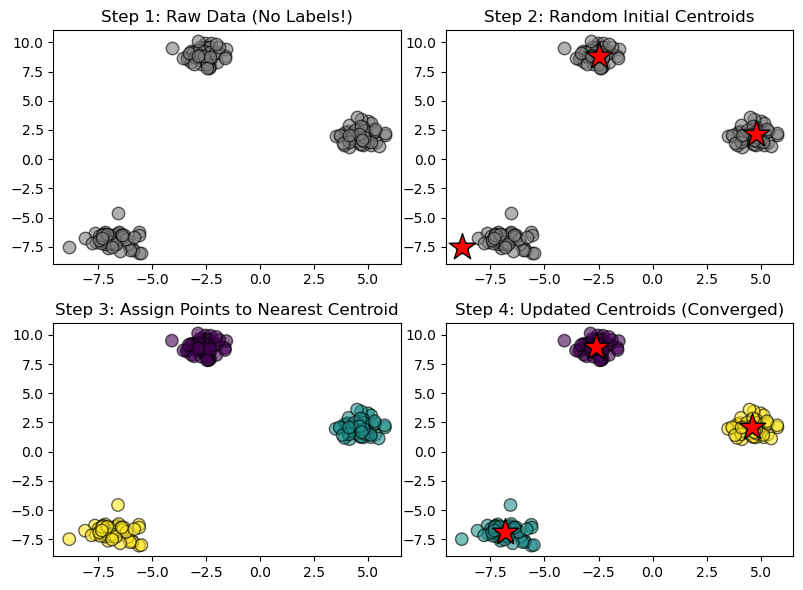

In [2]:
np.random.seed(42)
X_demo, _ = make_blobs(n_samples=150, centers=3, cluster_std=0.6, random_state=42)

fig, axes = plt.subplots(2, 2, figsize=(8,6))
axes = axes.ravel()

axes[0].scatter(X_demo[:, 0], X_demo[:, 1], c='gray', s=80, alpha=0.6, edgecolors='black')
axes[0].set_title('Step 1: Raw Data (No Labels!)')

initial_centroids = X_demo[np.random.choice(len(X_demo), 3, replace=False)]
axes[1].scatter(X_demo[:, 0], X_demo[:, 1], c='gray', s=80, alpha=0.6, edgecolors='black')
axes[1].scatter(initial_centroids[:, 0], initial_centroids[:, 1], c='red', s=400, marker='*', edgecolors='black')
axes[1].set_title('Step 2: Random Initial Centroids')

kmeans_demo = KMeans(n_clusters=3, init=initial_centroids, n_init=1, max_iter=1, random_state=42)
labels_step3 = kmeans_demo.fit_predict(X_demo)
axes[2].scatter(X_demo[:, 0], X_demo[:, 1], c=labels_step3, s=80, cmap='viridis', alpha=0.6, edgecolors='black')
axes[2].set_title('Step 3: Assign Points to Nearest Centroid')

kmeans_final = KMeans(n_clusters=3, random_state=42)
labels_final = kmeans_final.fit_predict(X_demo)
axes[3].scatter(X_demo[:, 0], X_demo[:, 1], c=labels_final, s=80, cmap='viridis', alpha=0.6, edgecolors='black')
axes[3].scatter(kmeans_final.cluster_centers_[:, 0], kmeans_final.cluster_centers_[:, 1], c='red', s=400, marker='*', edgecolors='black')
axes[3].set_title('Step 4: Updated Centroids (Converged)')

plt.tight_layout()
plt.show()

### Example: Clustering Students by Study Habits

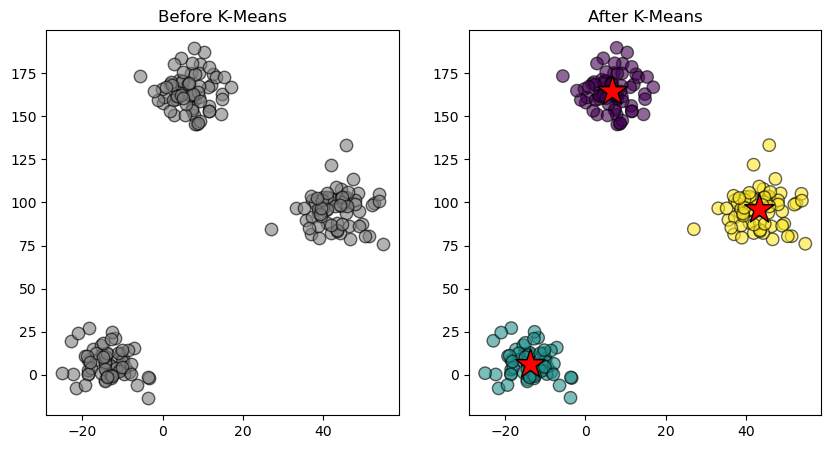

In [3]:
np.random.seed(42)
n_students = 200
X_students, _ = make_blobs(n_samples=n_students, centers=3, cluster_std=1.0, random_state=42)
X_students[:, 0] = X_students[:, 0] * 5 + 20
X_students[:, 1] = X_students[:, 1] * 10 + 75
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_students)
centers = kmeans.cluster_centers_

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.scatter(X_students[:, 0], X_students[:, 1], c='gray', s=80, alpha=0.6, edgecolors='black')
plt.title('Before K-Means')

plt.subplot(1, 2, 2)
plt.scatter(X_students[:, 0], X_students[:, 1], c=labels, cmap='viridis', s=80, alpha=0.6, edgecolors='black')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=500, marker='*', edgecolors='black')
plt.title('After K-Means')

plt.show()

### Discussion 💬
1. What happens if you increase k from 3 to 4?
2. What does a cluster center (mean) represent?
3. Name a scenario where K-Means might perform poorly.

----

## Density-Based Clustering

This kind of algorithm group points by **density** rather than distance to centroids.

### Core, Border, Noise Points
- **Core:** many nearby points
- **Border:** near a core but not dense
- **Noise:** isolated

Let's look at an example of a density-based clustering algorithm called **DBSCAN**.

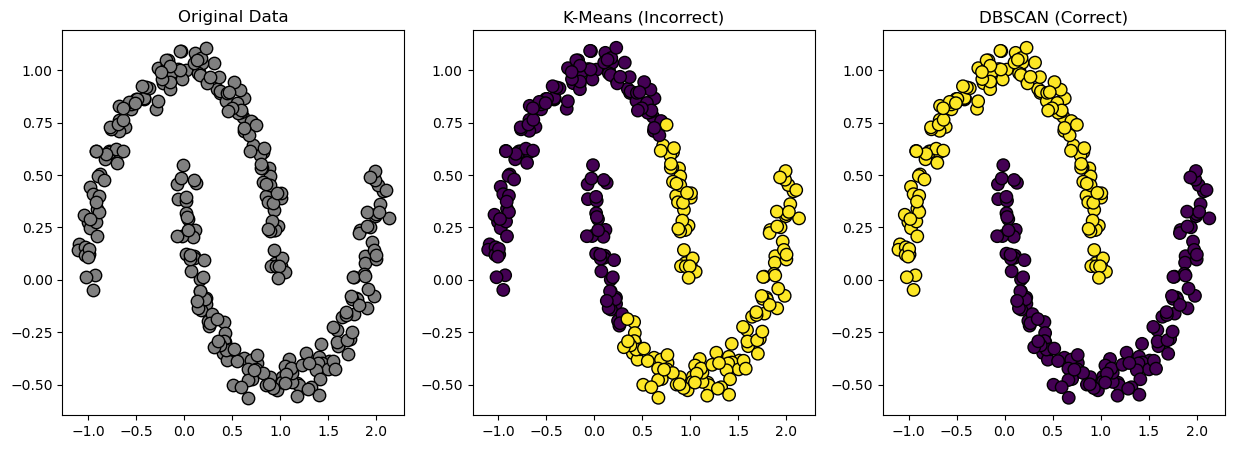

In [4]:
X_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=42)
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans_moons.fit_predict(X_moons)

dbscan = DBSCAN(eps=0.25, min_samples=5)
labels_dbscan = dbscan.fit_predict(X_moons)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_moons[:, 0], X_moons[:, 1], c='gray', s=80, edgecolors='black')
axes[0].set_title('Original Data')

axes[1].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans, cmap='viridis', s=80, edgecolors='black')
axes[1].set_title('K-Means (Incorrect)')

axes[2].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan, cmap='viridis', s=80, edgecolors='black')
axes[2].set_title('DBSCAN (Correct)')

plt.show()

### Discussion 💬
1. Why does DBSCAN work better than K-Means on moon shapes?
2. What happens if eps is too small or too large?
3. Give a real-world dataset where DBSCAN excels.

----

## Connectivity-Based Clustering

Also known as **hierarchical clustering**!

Hierarchical clustering builds a **tree-like structure** called a dendrogram.
<p align="left">
    <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20250905151703917591/dendrogram.webp" width = "300">
</p>

This can help us visualize the way the algorithm arrives at the resulting clusters.

We will use the following helper function later to do this!

In [5]:
# HELPER FUNCTION TO PLOT DENDROGRAM
def plot_dendrogram(agglo_model, **kwargs):
    counts = np.zeros(agglo_model.children_.shape[0])
    n_samples = len(agglo_model.labels_)

    for i, merge in enumerate(agglo_model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [agglo_model.children_, agglo_model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

### Two Approaches
- **Agglomerative:** bottom-up merging
- **Divisive:** top-down splitting

Let's look at each of these approaches in more detail by studying the `AgglomerativeClustering` and `BisectingKMeans` algorithms from `sklearn`.

----

## Agglomerative Clustering

### Algorithm Steps
Here is a high level outline of the algorithm, excerpted from [this reference](https://www.geeksforgeeks.org/machine-learning/hierarchical-clustering/)
1. Start with each data point as its own cluster
2. Compute distances between all clusters
3. Merge the two closest clusters based on a **linkage** method
4. Update the distances to reflect the new cluster
5. Repeat merging until the desired number of clusters or one cluster remains

### Linkage Criteria
In the overview above, we mentioned **linkage**. But what is that?!

Here are a few examples of how we can decide which clusters to merge together:
- **Single linkage:** smallest distance
- **Complete linkage:** largest distance
- **Average linkage:** average pairwise distance
- **Ward’s method:** minimizes variance

Average linkage gives a balanced view of cluster similarity by looking at *all* pairwise distances rather than extremes.

<p align="left">
    <img src = "https://media.geeksforgeeks.org/wp-content/uploads/20250912152548586277/group_average.webp" width = "600">
</p>

Finally, let's see an example of how we might run `AgglomerativeClustering` and visualize its dendrogram

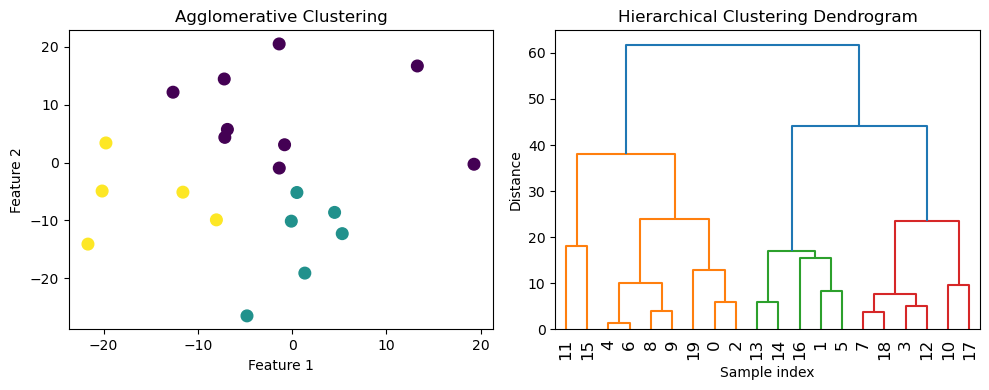

In [6]:
# make small set of noisy data
X, _ = make_blobs(n_samples=20, centers=3, cluster_std=10, random_state=42)

# init model to predict labels
clustering = AgglomerativeClustering(n_clusters=3)
labels = clustering.fit_predict(X)

# dummy model for dendrogram
agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg.fit(X)

# make figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

# plot output labels on first axis
ax1.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
ax1.set_title("Agglomerative Clustering")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")

# plot dendrogram on second axis
plt.sca(ax2)
plot_dendrogram(agg, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.xticks(rotation = 90)

plt.show()

----

## Bisecting K-Means
Divisive algorithms are bottom-up and follow an inverted process compared to agglomerative clustering:
1. Starts with all data points as **one big cluster**
2. Finds the *largest* cluster and splits it into two using `KMeans`
3. Repeat the splitting process until the desired number of clusters

Here's a quick illustration from the `sklearn` [documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_bisect_kmeans.html) of how `BisectingKMeans` differents from the simpler `KMeans` algorithm we saw earlier

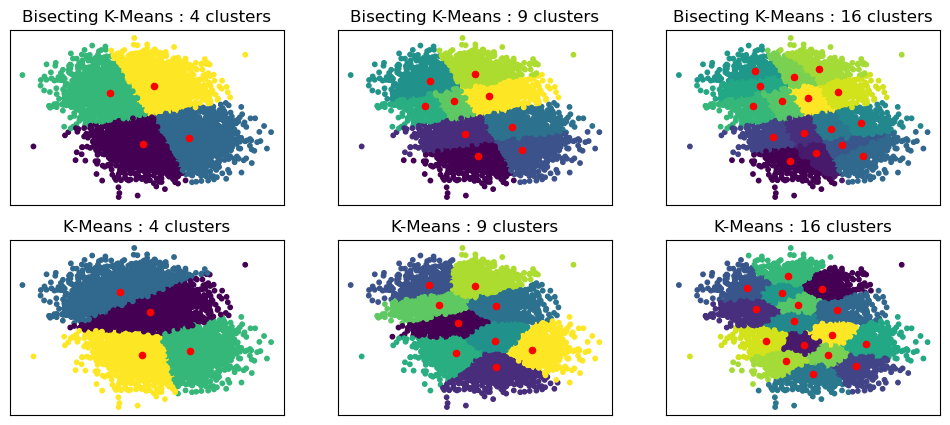

In [7]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Generate sample data
n_samples = 10000
random_state = 0
X, _ = make_blobs(n_samples=n_samples, centers=2, random_state=random_state)

# Number of cluster centers for KMeans and BisectingKMeans
n_clusters_list = [i**2 for i in range(2,5)]

# Algorithms to compare
clustering_algorithms = {
    "Bisecting K-Means": BisectingKMeans,
    "K-Means": KMeans,
}

# Make subplots for each variant
fig, axs = plt.subplots(
    len(clustering_algorithms), len(n_clusters_list), figsize=(12, 5)
)
axs = axs.T

for i, (algorithm_name, Algorithm) in enumerate(clustering_algorithms.items()):
    for j, n_clusters in enumerate(n_clusters_list):
        algo = Algorithm(n_clusters=n_clusters, random_state=random_state, n_init=3)
        algo.fit(X)
        centers = algo.cluster_centers_

        axs[j, i].scatter(X[:, 0], X[:, 1], s=10, c=algo.labels_)
        axs[j, i].scatter(centers[:, 0], centers[:, 1], c="r", s=20)

        axs[j, i].set_title(f"{algorithm_name} : {n_clusters} clusters")


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Notice that the Bisecting K-means algorithm divides the larger clusters somewhat symmetrically as `n_clusters` increases!

However, the K-means clusters are **only** constrained by the distance to the centroids, so we see less symmetry in its output clusters. 

## Final Notes on Hierarchical Clustering
The homework for this week is mostly focused on centroid and density based clustering! 

Hierarchical clustering is definitely the least intuitive of the three methods, so don't worry if this seems confusing at first.

You can walk through these

----

## Evaluation of Clustering

Let's look at some example clusters by eye to start:

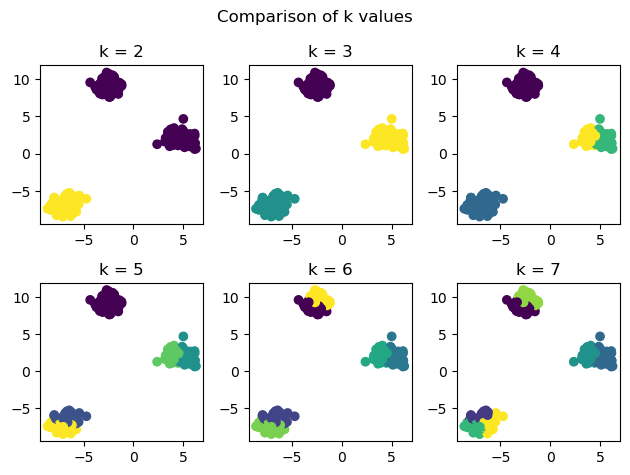

In [8]:
np.random.seed(42)
X_eval, y_eval = make_blobs(n_samples=300, centers=3, cluster_std=0.7, random_state=42)

fig,axes = plt.subplots(2,3, tight_layout=True)
fig.suptitle("Comparison of k values")
axes = axes.ravel()

k_vals = range(2, 8)
sil_scores = []
rand_scores = []

for i,k in enumerate(k_vals):
    kmeans_eval = KMeans(n_clusters=k, random_state=42)
    labels = kmeans_eval.fit_predict(X_eval)
    sil_scores.append(silhouette_score(X_eval, labels))
    rand_scores.append(rand_score(y_eval, labels))

    axes[i].scatter(X_eval[:,0], X_eval[:,1], c=labels)
    axes[i].set_title(f"k = {k}")

plt.show()

Which of these *k* values seems like the best choice?

Now, we will use some formal evaluation metrics to confirm our choice.

### Silhouette Score
The silhouette score measures cohesion *and* cluster separation. A high silhouette score indicates that the clusters are both self similar as well as distinct from the other clusters.

Possible values range from -1 to 1, where:
- 1 indicates cohesive and distinct clusters
- 0 indicates overlapping clusters
- -1 indicates incohesive and indistinct clusters

### Rand Index
The rand index tells us how similar the true clustering is to the predicted one. In other words, are the labeled clusters better than random chance?

A variation of this metric is called the adjusted rand index and it can tell us if the predicted clusters are worse than randomly assigning labels. 

The obvious drawback to this metric is that it requires truth labels, and we are often using unsupervised methods when we don't have truth labels.

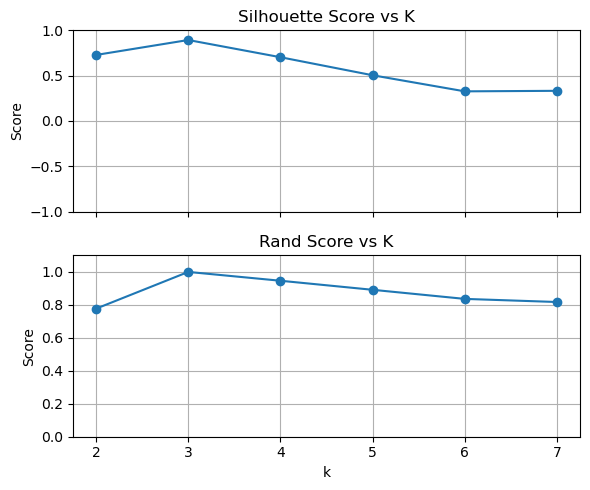

In [9]:
# Show scores
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(6,5), tight_layout=True, sharex=True)
ax1.plot(k_vals, sil_scores, marker='o')
ax1.set_title('Silhouette Score vs K')
ax1.set_ylabel('Score')
ax1.set_ylim([-1,1])
ax1.grid()

ax2.plot(k_vals, rand_scores, marker='o')
ax2.set_title('Rand Score vs K')
ax2.set_ylabel('Score')
ax2.set_xlabel('k')
ax2.set_ylim([0,1.1])
ax2.grid()
plt.show()

----

## Comparison of Methods

Let's summarize what we've learned today by comparing some of the example algorithms directly.

| Algorithm | Strengths | Weaknesses | Best Use |
|----------|-----------|-------------|----------|
| K-Means | Fast, easy | Bad for irregular shapes | Simple clusters |
| DBSCAN | Arbitrary shapes, finds noise | Sensitive to eps | Irregular/noisy data |
| Bisecting K-Means | Hierarchy, efficient | Still centroid-based | When hierarchy needed |

We will compare the algorithms above with a set of concentric circles:

In [10]:
X_compare, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

First we run each algorithm below:

In [11]:
labels_k = KMeans(n_clusters=2, random_state=42).fit_predict(X_compare)
labels_d = DBSCAN(eps=0.2).fit_predict(X_compare)
labels_b = BisectingKMeans(n_clusters=2, random_state=42).fit_predict(X_compare)

Now we plot to compare the results:

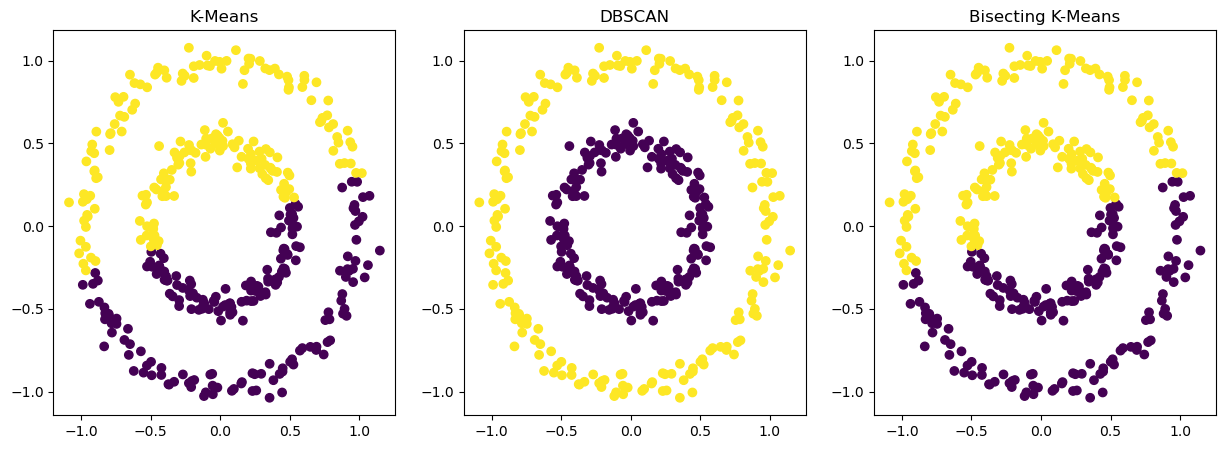

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].scatter(X_compare[:, 0], X_compare[:, 1], c=labels_k)
axes[0].set_title('K-Means')

axes[1].scatter(X_compare[:, 0], X_compare[:, 1], c=labels_d)
axes[1].set_title('DBSCAN')

axes[2].scatter(X_compare[:, 0], X_compare[:, 1], c=labels_b)
axes[2].set_title('Bisecting K-Means')

plt.show()

## Discussion 💬
1. Which algorithm handles circles well?
2. Which struggles?
3. Why does DBSCAN succeed?
4. How does noise affect each algorithm?